# BB84 Protocol
In this code we simulate the BB84 protocol between parties named "Alice" and "Bob" with 100 bits.

It beggins with Alice sending her random qubits string to Bob, randomly chosing a basis to encode them. Then Bob also chooses, randomly, the basis he will use to measure the qubits. With that done, they exclude bits which resulted from measurements in different basis. The remaining bits are the shared cryptographic key between both parties.

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.tools.monitor import *
from qiskit.visualization import *

provider = IBMQ.load_account()

/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


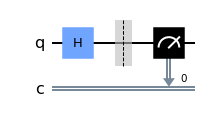

In [2]:
# First let us define the random bits generator
rand = QuantumCircuit(1, 1)

rand.h(0)
rand.barrier()
rand.measure(0, 0)

rand.draw(output = 'mpl')

In [3]:
# Now we generate the 100 random bits Alice will send to Bob
n_bits = 100
backend = Aer.get_backend('qasm_simulator')
job = execute(rand, backend, shots = n_bits, memory = True)
bits_a = [int(i) for i in job.result().get_memory()]
print(bits_a)

[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]


In [4]:
# And the basis for sending each qubit
# 0 = |0> and |1> basis
# 1 = |+> and |-> basis
job = execute(rand, backend, shots = n_bits, memory = True)
basis_a = [int(i) for i in job.result().get_memory()]
print(basis_a)

[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]


In [5]:
# Let us also generate the basis for Bob measurements
job = execute(rand, backend, shots = n_bits, memory = True)
basis_b = [int(i) for i in job.result().get_memory()]
print(basis_b)

[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]


In [6]:
# Now we define the circuit that describes Alice sending a qubit and Bob receiving it
bits_b = []

for i in range(n_bits):
    send = QuantumCircuit(1, 1)
    if bits_a[i] == 1:
        send.x(0)
    if basis_a[i] == 1:
        send.h(0)
        
    # Then the qubit is sent to Bob and he measures
    if basis_b[i] == 1:
        send.h(0)
    send.measure(0, 0)
    
    job = execute(send, backend, shots = 1, memory = True)
    bits_b.append(int(job.result().get_memory()[0]))
    
print(bits_b)


[0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0]


In [7]:
# Now they check which qubits were measured in concordant basis
key = []

for i in range(n_bits):
    if basis_a[i] == basis_b[i]:
        key.append(bits_a[i])
        
print('Shared key is', len(key), 'bits long \n')
print(key)

Shared key is 52 bits long 

[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0]
